# Filtrado de datos

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import confusion_matrix, classification_report 
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import seaborn as sns

data = pd.read_csv('Datos_reducidos.csv')
print ("Original Wine dataframe", data.shape)

data = data.rename(columns={'Flow Duration':'Flow_Duration', 'Dst Port':'Dst_Port', 
                            'Tot Fwd Pkts': 'Tot_Fwd_Pkts', 'Tot Bwd Pkts':'Tot_Bwd_Pkts', 
                            'TotLen Fwd Pkts':'TotLen_Fwd_Pkts', 'TotLen Bwd Pkts':'TotLen_Bwd_Pkts',
                            'Fwd Pkt Len Max':'Fwd_Pkt_Len_Max','Fwd Pkt Len Min':'Fwd_Pkt_Len_Min'})

data = data.drop(['Flow Pkts/s'], axis=1)
data=data.drop(columns='Timestamp', axis =1)

data.loc[data.Label=='Benign','Label']='0'
data.loc[data.Label=='Brute Force -Web','Label']='1'
data.loc[data.Label=='Brute Force -XSS','Label']='2'
data.loc[data.Label=='SQL Injection','Label']='3'
data['Label'] = data['Label'].astype(int)

data = data.dropna()

X_orig = data.drop('Label', axis=1)
y_orig = data['Label']
y_orig = data[['Label']].copy()

Original Wine dataframe (1048575, 48)


# SMOTE y separación en conjunto train y conjunto test

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import confusion_matrix, classification_report 
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import seaborn as sns

print("Nº de muestras clase '0' en Y antes de SMOTE: {}".format(sum(y_orig["Label"] == 0)))  
print("Nº de muestras clase '1' en Y antes de SMOTE: {}".format(sum(y_orig["Label"] == 1)))  
print("Nº de muestras clase '2' en Y antes de SMOTE: {}".format(sum(y_orig["Label"] == 2)))  
print("Nº de muestras clase '3' en Y antes de SMOTE: {}".format(sum(y_orig["Label"] == 3)))

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X_orig, y_orig)

print("Nº de muestras clase '0' en Y después de SMOTE: {}".format(sum(y["Label"] == 0)))  
print("Nº de muestras clase '1' en Y después de SMOTE: {}".format(sum(y["Label"] == 1)))  
print("Nº de muestras clase '2' en Y después de SMOTE: {}".format(sum(y["Label"] == 2)))  
print("Nº de muestras clase '3' en Y después de SMOTE: {}".format(sum(y["Label"] == 3)))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_sm_df = pd.DataFrame(X_train)
X_train_sm_df.columns=X_orig.columns

Y_train_sm_df=pd.DataFrame(y_train)
Y_train_sm_df.columns=['Label']

X_test_sm_df = pd.DataFrame(X_test)
X_test_sm_df.columns=X_orig.columns

Y_test_sm_df=pd.DataFrame(y_test)
Y_test_sm_df.columns=['Label']

print("Número de muestras clase '0' en Y_train_sm_df después de split: {}".format(sum(Y_train_sm_df["Label"] == 0)))  
print("Número de muestras clase '1' en Y_train_sm_df después de split: {}".format(sum(Y_train_sm_df["Label"] == 1)))
print("Número de muestras clase '2' en Y_train_sm_df después de split: {}".format(sum(Y_train_sm_df["Label"] == 2)))  
print("Número de muestras clase '3' en Y_train_sm_df después de split: {}".format(sum(Y_train_sm_df["Label"] == 3)))

print("Número de muestras clase '0' en Y_test_sm_df después de split: {}".format(sum(Y_test_sm_df["Label"] == 0)))  
print("Número de muestras clase '1' en Y_test_sm_df después de split: {}".format(sum(Y_test_sm_df["Label"] == 1)))
print("Número de muestras clase '2' en Y_test_sm_df después de split: {}".format(sum(Y_test_sm_df["Label"] == 2)))  
print("Número de muestras clase '3' en Y_test_sm_df después de split: {}".format(sum(Y_test_sm_df["Label"] == 3)))

Nº de muestras clase '0' en Y antes de SMOTE: 1048009
Nº de muestras clase '1' en Y antes de SMOTE: 362
Nº de muestras clase '2' en Y antes de SMOTE: 151
Nº de muestras clase '3' en Y antes de SMOTE: 53
Nº de muestras clase '0' en Y después de SMOTE: 1048009
Nº de muestras clase '1' en Y después de SMOTE: 1048009
Nº de muestras clase '2' en Y después de SMOTE: 1048009
Nº de muestras clase '3' en Y después de SMOTE: 1048009
Número de muestras clase '0' en Y_train_sm_df después de split: 702245
Número de muestras clase '1' en Y_train_sm_df después de split: 702707
Número de muestras clase '2' en Y_train_sm_df después de split: 701378
Número de muestras clase '3' en Y_train_sm_df después de split: 702334
Número de muestras clase '0' en Y_test_sm_df después de split: 345764
Número de muestras clase '1' en Y_test_sm_df después de split: 345302
Número de muestras clase '2' en Y_test_sm_df después de split: 346631
Número de muestras clase '3' en Y_test_sm_df después de split: 345675


# SGD

## Entrenamiento y obtención de predicciones SGD

In [86]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
import time

start = time.perf_counter()

sgd = SGDClassifier(loss='hinge', random_state=42)
sgd.fit(X_train, y_train['Label'].values.ravel())  

y_pred_SGD = sgd.predict(X_test)

accuracy_SGD = accuracy_score(y_test['Label'].values.ravel(), y_pred_SGD) 
print("Precisión SGD:", accuracy_SGD*100, "%")

end = time.perf_counter()
elapsed_seconds = end - start
elapsed_hours = elapsed_seconds / 3600
print("Tiempo sgd:", elapsed_hours, "hours")
tiempo_sgd = elapsed_hours

Confusion Matrix:
[[305681  14179    194  25710]
 [  2004 230400    193 112705]
 [   186   8470 235111 102864]
 [     0   1007      0 344668]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.94    345764
           1       0.91      0.67      0.77    345302
           2       1.00      0.68      0.81    346631
           3       0.59      1.00      0.74    345675

    accuracy                           0.81   1383372
   macro avg       0.87      0.81      0.81   1383372
weighted avg       0.87      0.81      0.81   1383372

Precisión SGD: 80.66232365553155 %
Tiempo sgd: 0.008147371138889463 hours


## Matriz de confusión e informe de clasificación SGD

Confusion Matrix: 
 [[305681  14179    194  25710]
 [  2004 230400    193 112705]
 [   186   8470 235111 102864]
 [     0   1007      0 344668]]


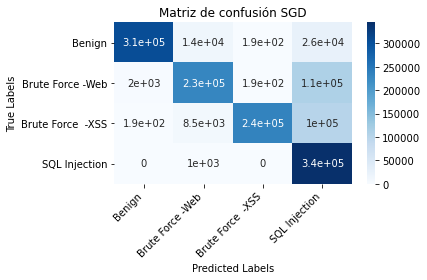

                   precision    recall  f1-score   support

           Benign       0.99      0.88      0.94    345764
 Brute Force -Web       0.91      0.67      0.77    345302
Brute Force  -XSS       1.00      0.68      0.81    346631
    SQL Injection       0.59      1.00      0.74    345675

         accuracy                           0.81   1383372
        macro avg       0.87      0.81      0.81   1383372
     weighted avg       0.87      0.81      0.81   1383372



In [4]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

clases = ['Benign', 'Brute Force -Web', 'Brute Force  -XSS', 'SQL Injection']

cm_sgd = confusion_matrix(y_test, y_pred_SGD)
print("Confusion Matrix: \n", cm_sgd) 

sns.heatmap(cm_sgd, annot=True, cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=clases)
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=clases)
plt.title("Matriz de confusión SGD")

ax = plt.gca()
ax.set_yticklabels(clases, rotation=0)
ax.set_xticklabels(clases, rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(classification_report(y_test, y_pred_SGD, target_names=clases))

## Precisión por clase SGD

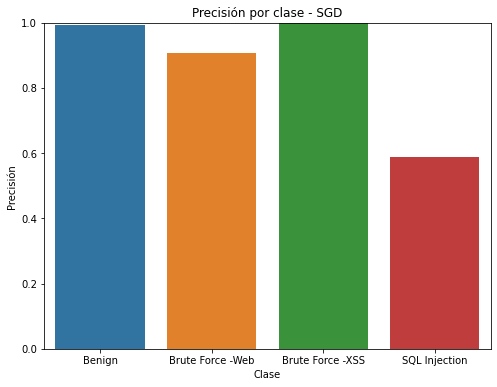

In [5]:
from sklearn.metrics import precision_score
precision_clase_sgd = precision_score(Y_test_sm_df, y_pred_SGD, average=None)

plt.figure(figsize=(8,6))
sns.barplot(x=['Benign', 'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection'], y=precision_clase_sgd)
plt.ylim(0,1)
plt.title("Precisión por clase - SGD")
plt.xlabel("Clase")
plt.ylabel("Precisión")
plt.show()

## curva ROC SGD

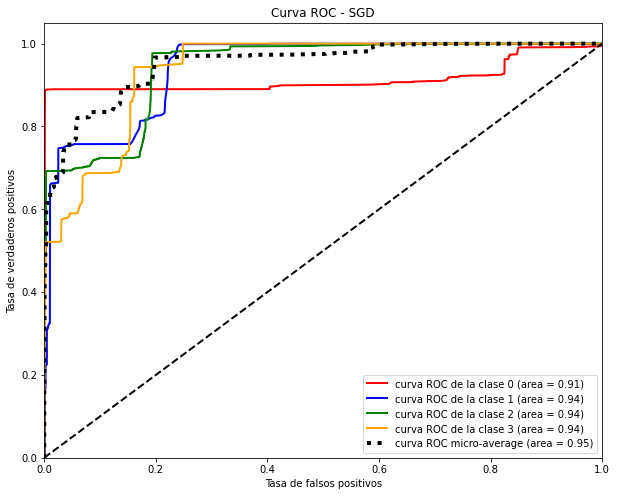

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test_bin.shape[1]

y_score = sgd.decision_function(X_test)

fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
lw = 2
colors = ['red', 'blue', 'green', 'orange'] # puedes sustituir los colores por los que prefieras
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='curva ROC de la clase {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot(fpr_micro, tpr_micro, color='black', linestyle=':', linewidth=4,
         label='curva ROC micro-average (area = {0:0.2f})'
         ''.format(roc_auc_micro))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC - SGD')
plt.legend(loc="lower right")
plt.show()

## Tabla con hiperparametros SGD

In [6]:
import pandas as pd
from IPython.display import display, HTML

random_state = [42,42]
loss_function = ['hinge','log']
tiempo = [0.0075453024166603835, 0.008505156138889004]
precision = [80.66232365553155, 76.84259909843483]

df = pd.DataFrame({'random_state': random_state,
                   'loss function': loss_function,
                    'precisión': precision,
                   'tiempo (horas)': tiempo})

sgd_prec = df.sort_values('precisión', ascending=False)

titulo = "<h2 style='text-align: center; margin-left: 50px;'>Modelo SGD</h2>"

tabla_sgd = sgd_prec.to_html(index=False)
tabla = titulo + tabla_sgd

style = """

<style>
  table {
    border-collapse: collapse;
    width: 100%;
    max-width: 800px;
  }
  th, td {
    text-align: left;
    padding: 8px;
  }
  th {
    background-color: #4CAF50;
    color: white;
  }
  tr:nth-child(even) {
    background-color: #f2f2f2;
  }
  tr:hover {
    background-color: #ddd;
  }
</style>
"""

display(HTML(style + tabla_sgd))

random_state,loss function,precisión,tiempo (horas)
42,hinge,80.662324,0.007545
42,log,76.842599,0.008505


# REGRESIÓN LOGÍSTICA

## Entrenamiento y obtención de predicciones Regresión Logística

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

start = time.perf_counter()

regLog = LogisticRegression(random_state=42, multi_class='multinomial', solver='lbfgs', max_iter=300)
regLog.fit(X_train, y_train.values.ravel())  

y_pred_logistic = regLog.predict(X_test)

accuracy_LOGISTIC = accuracy_score(y_test.values.ravel(), y_pred_logistic) 
print("Precisión Regresion Logística:", accuracy_LOGISTIC*100, "%")

end = time.perf_counter()
elapsed_seconds = end - start
elapsed_hours = elapsed_seconds / 3600
print("Tiempo Regresion Logistica:", elapsed_hours, "hours")
tiempo_logistic = elapsed_hours

C:\Users\alber\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precisión Regresion Logística: 83.13512200622826 %
Tiempo Regresion Logistica: 0.06540136152777754 hours


## Matriz de confusión e informe clasificación Regresión Logística

Confusion Matrix: 
 [[307351  17905    800  19708]
 [    40 260817  83041   1404]
 [   102   7781 336956   1792]
 [   326   9610  90795 244944]]


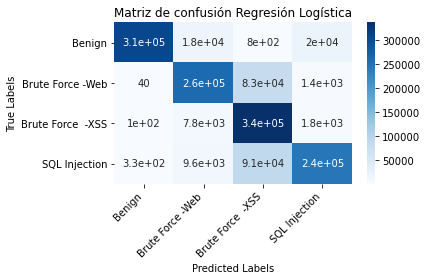

                   precision    recall  f1-score   support

           Benign       1.00      0.89      0.94    345764
 Brute Force -Web       0.88      0.76      0.81    345302
Brute Force  -XSS       0.66      0.97      0.79    346631
    SQL Injection       0.91      0.71      0.80    345675

         accuracy                           0.83   1383372
        macro avg       0.86      0.83      0.83   1383372
     weighted avg       0.86      0.83      0.83   1383372



In [88]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

clases = ['Benign', 'Brute Force -Web', 'Brute Force  -XSS', 'SQL Injection']

cm_logistic = confusion_matrix(y_test, y_pred_logistic)
print("Confusion Matrix: \n", cm_logistic) 

sns.heatmap(cm_logistic, annot=True, cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=clases)
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=clases)
plt.title("Matriz de confusión Regresión Logística")

ax = plt.gca()
ax.set_yticklabels(clases, rotation=0)
ax.set_xticklabels(clases, rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(classification_report(y_test, y_pred_logistic, target_names=clases))

## precisión por clase Regresión Logística

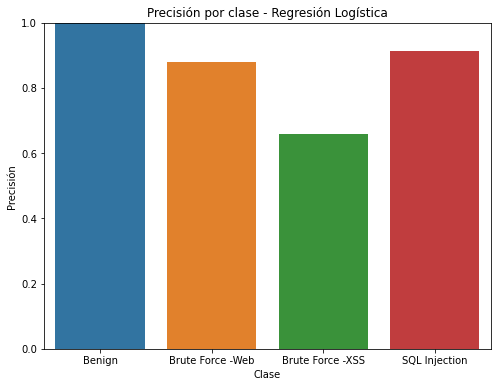

In [9]:
from sklearn.metrics import precision_score
precision_clase_logistic = precision_score(Y_test_sm_df, y_pred_logistic, average=None)

plt.figure(figsize=(8,6))
sns.barplot(x=['Benign', 'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection'], y=precision_clase_logistic)
plt.ylim(0,1)
plt.title("Precisión por clase - Regresión Logística")
plt.xlabel("Clase")
plt.ylabel("Precisión")
plt.show()

# Curva ROC Regresión logística

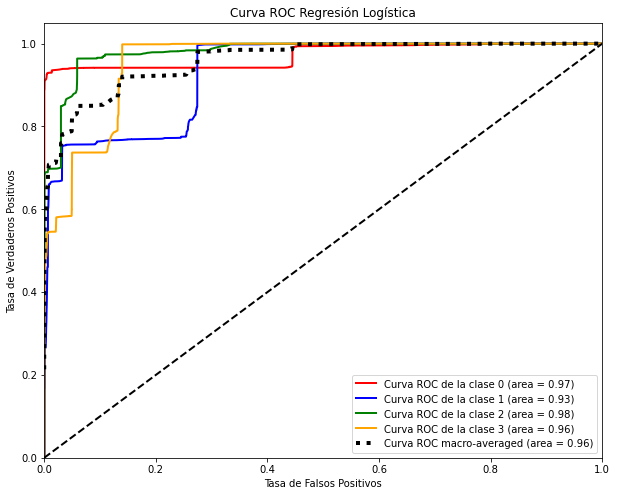

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


y_score = regLog.predict_proba(X_test)

y_test_bin = label_binarize(y_test, classes=regLog.classes_)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(regLog.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(regLog.classes_))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(regLog.classes_)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(regLog.classes_)
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


plt.figure(figsize=(10, 8))
lw = 2
colors = ['red', 'blue', 'green', 'orange']
for i, color in zip(range(len(regLog.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='Curva ROC de la clase {0} (area = {1:0.2f})'
             ''.format(regLog.classes_[i], roc_auc[i]))

plt.plot(fpr["macro"], tpr["macro"],
         label='Curva ROC macro-averaged (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='black', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Regresión Logística')
plt.legend(loc="lower right")

plt.show()

## Tabla con hiperparámetros Regresion logística

In [10]:
import pandas as pd
from IPython.display import display, HTML

random_state = [42,42,42,42,42,42,42,42]
multi_class = ['multinomial','multinomial','multinomial','multinomial','multinomial','multinomial','multinomial','multinomial']
max_iter = [100,300,500,1000,100,300,500,1000]
solver = ['lbfgs','lbfgs','lbfgs','lbfgs','saga','saga','saga','saga']
tiempo = [0.020517054388894597, 0.06291875300000001, 0.09713720494444446, 0.19679822458333335, 0.12994743061111105, 0.3950905126944445, 0.5923450838611112,1.1698872875000002]
precision = [79.56934215814691,  83.13512200622826, 83.08502702093146, 82.99474038797952, 74.45777419233582, 76.734963552826,77.70997244414373, 79.0237911422235]


df = pd.DataFrame({'random_state': random_state,
'multi_class': multi_class,
'max_iter': max_iter,
'solver': solver,
'tiempo (horas)': tiempo,
'precision': precision})

titulo = "<h2 style='text-align: center;'>Modelo Regresión Logística</h2>"

tabla_regLog = df.to_html(index=False)
tabla_regLog = titulo + tabla_regLog

style = """

<style>
  table {
    border-collapse: collapse;
    width: 100%;
    max-width: 800px;
  }
  th, td {
    text-align: left;
    padding: 8px;
  }
  th {
    background-color: #4CAF50;
    color: white;
  }
  tr:nth-child(even) {
    background-color: #f2f2f2;
  }
  tr:hover {
    background-color: #ddd;
  }
</style>
"""


display(HTML(style + tabla_regLog))

random_state,multi_class,max_iter,solver,tiempo (horas),precision
42,multinomial,100,lbfgs,0.020517,79.569342
42,multinomial,300,lbfgs,0.062919,83.135122
42,multinomial,500,lbfgs,0.097137,83.085027
42,multinomial,1000,lbfgs,0.196798,82.994740
42,multinomial,100,saga,0.129947,74.457774
42,multinomial,300,saga,0.395091,76.734964
42,multinomial,500,saga,0.592345,77.709972
42,multinomial,1000,saga,1.169887,79.023791


# ÁRBOL DE DECISIÓN

## Entrenamiento y obtención de predicciones Árbol de decisión

In [16]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.tree import export_graphviz
import graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
import time

start = time.perf_counter()                        

tree_model = tree.DecisionTreeClassifier(max_depth=12, random_state=42) 

tree_model = tree_model.fit(X_train_sm_df, Y_train_sm_df)

y_pred_tree = tree_model.predict(X_test_sm_df)

accuracy_score_ARBOL=tree_model.score(X_test_sm_df, Y_test_sm_df)
print("Precisión árbol de decisión:",accuracy_score_ARBOL)

end = time.perf_counter()
elapsed_seconds = end - start
elapsed_hours = elapsed_seconds / 3600
print("Tiempo árbol de decisión:", elapsed_hours, "hours")
tiempo_arbol=elapsed_hours


Precisión árbol de decisión: 0.9781360328241427
Tiempo árbol de decisión: 0.023952739833333334 hours


## Matriz de confusión e informe de clasificación Árbol de decisión

Confusion Matrix: 
 [[345321    419      3     21]
 [    31 343264    985   1022]
 [     2   2796 337029   6804]
 [     4  18159      0 327512]]


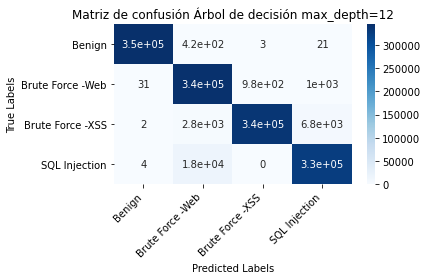

                  precision    recall  f1-score   support

          Benign       1.00      1.00      1.00    345764
Brute Force -Web       0.94      0.99      0.97    345302
Brute Force -XSS       1.00      0.97      0.98    346631
   SQL Injection       0.98      0.95      0.96    345675

        accuracy                           0.98   1383372
       macro avg       0.98      0.98      0.98   1383372
    weighted avg       0.98      0.98      0.98   1383372



In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

clases = ['Benign', 'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection']

cm_arbol = confusion_matrix(Y_test_sm_df, y_pred_tree)
print("Confusion Matrix: \n", cm_arbol) 

sns.heatmap(cm_arbol, annot=True, cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=clases)
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=clases)
plt.title("Matriz de confusión Árbol de decisión max_depth=12")
ax = plt.gca()
ax.set_yticklabels(clases, rotation=0)
ax.set_xticklabels(clases, rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(classification_report(Y_test_sm_df, y_pred_tree, target_names=clases))

## precisión por clase Árbol de decisión

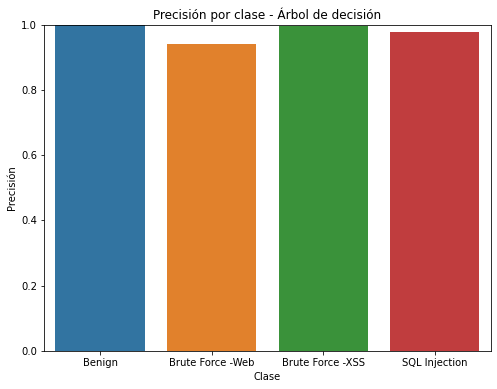

In [13]:
from sklearn.metrics import precision_score

precision_clase_arbol = precision_score(Y_test_sm_df, y_pred_tree, average=None)

plt.figure(figsize=(8,6))
sns.barplot(x=['Benign', 'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection'], y=precision_clase_arbol)
plt.ylim(0,1)
plt.title("Precisión por clase - Árbol de decisión")
plt.xlabel("Clase")
plt.ylabel("Precisión")
plt.show()

## curva ROC Árbol de decisión

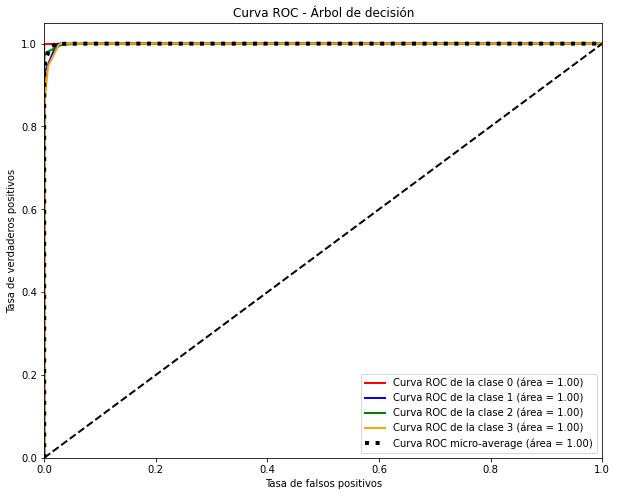

In [90]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(Y_test_sm_df, classes=np.unique(Y_test_sm_df))
n_classes = y_test_bin.shape[1]

y_score = tree_model.predict_proba(X_test_sm_df)

fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
lw = 2
colors = ['red', 'blue', 'green', 'orange'] # Puedes cambiar los colores según tus preferencias
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='Curva ROC de la clase {0} (área = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot(fpr_micro, tpr_micro, color='black', linestyle=':', linewidth=4,
         label='Curva ROC micro-average (área = {0:0.2f})'
         ''.format(roc_auc_micro))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC - Árbol de decisión')
plt.legend(loc="lower right")
plt.show()

## Otras gráficas: tabla importancia características Árbol de decisión

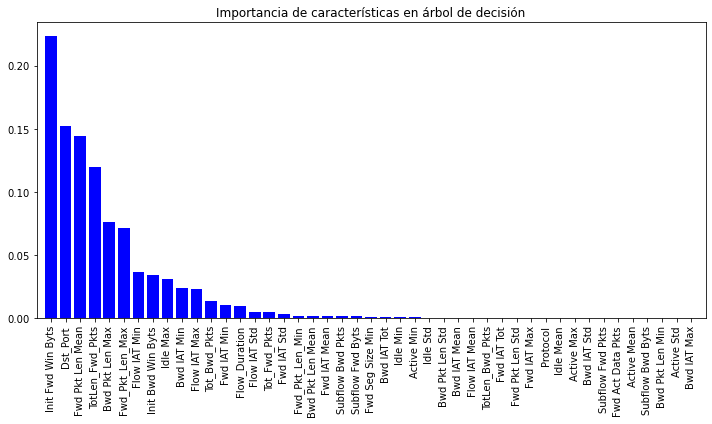

       Característica   Importancia
0   Init Fwd Win Byts  2.229551e-01
1            Dst_Port  1.524870e-01
2    Fwd Pkt Len Mean  1.443106e-01
3     TotLen_Fwd_Pkts  1.200865e-01
4     Bwd Pkt Len Max  7.656231e-02
5     Fwd_Pkt_Len_Max  7.150395e-02
6        Flow IAT Min  3.691286e-02
7   Init Bwd Win Byts  3.433428e-02
8            Idle Max  3.088254e-02
9         Bwd IAT Min  2.419752e-02
10       Flow IAT Max  2.348979e-02
11       Tot_Bwd_Pkts  1.349356e-02
12        Fwd IAT Min  1.051238e-02
13      Flow_Duration  9.832449e-03
14       Flow IAT Std  5.297178e-03
15       Tot_Fwd_Pkts  4.919315e-03
16        Fwd IAT Std  3.060634e-03
17    Fwd_Pkt_Len_Min  2.088045e-03
18   Bwd Pkt Len Mean  1.802719e-03
19       Fwd IAT Mean  1.688354e-03
20   Subflow Bwd Pkts  1.579656e-03
21   Subflow Fwd Byts  1.578739e-03
22   Fwd Seg Size Min  1.116931e-03
23        Bwd IAT Tot  1.036103e-03
24           Idle Min  9.739865e-04
25         Active Min  8.847419e-04
26           Idle Std  5.636

Característica,Importancia
Init Fwd Win Byts,2.229551e-01
Dst_Port,1.524870e-01
Fwd Pkt Len Mean,1.443106e-01
TotLen_Fwd_Pkts,1.200865e-01
Bwd Pkt Len Max,7.656231e-02
Fwd_Pkt_Len_Max,7.150395e-02
Flow IAT Min,3.691286e-02
Init Bwd Win Byts,3.433428e-02
Idle Max,3.088254e-02
Bwd IAT Min,2.419752e-02


Característica,Importancia Árbol decisión
Init Fwd Win Byts,0.222955
Dst_Port,0.152487
Fwd Pkt Len Mean,0.144311
Total importancia,0.519753


In [37]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML

importancias_arbol = tree_model.feature_importances_
indices = np.argsort(importancias_arbol)[::-1]
caracteristicas = X_train_sm_df.columns.values

#gráfica de importancia características
plt.figure(figsize=(10,6))
plt.title("Importancia de características en árbol de decisión")
plt.bar(range(len(indices)), importancias_arbol[indices], color="b", align="center")
plt.xticks(range(len(indices)), caracteristicas[indices], rotation=90)
plt.xlim([-1, len(indices)])
plt.tight_layout()
plt.show()

#tabla de importancia características
imp_caracteristicas = pd.DataFrame({'Característica': caracteristicas[indices], 'Importancia': importancias_arbol[indices],})
imp_caracteristicas = imp_caracteristicas.sort_values('Importancia', ascending=False)
print(imp_caracteristicas)


style = """
<style>
  table {
    border-collapse: collapse;
    width: 100%;
    max-width: 800px;
  }
  th, td {
    text-align: left;
    padding: 8px;
  }
  th {
    background-color: #4CAF50;
    color: white;
  }
  tr:nth-child(even) {
    background-color: #f2f2f2;
  }
  tr:hover {
    background-color: #ddd;
  }
</style>
"""

tabla_arbol_imp = imp_caracteristicas.to_html(index=False)
display(HTML(style + tabla_arbol_imp))

#tabla que muestra 50% importancia acumulada. Se utiliza 52 para aproximar.

importancias_orden = imp_caracteristicas.sort_values('Importancia', ascending=False)
importancia_acumulada = importancias_orden['Importancia'].cumsum()
importancias_tabla50 = importancias_orden[importancia_acumulada <= 0.52 ]['Característica']

importancias_tabla50= imp_caracteristicas[imp_caracteristicas['Característica'].isin(importancias_tabla50)]
importancias_tabla50 = importancias_tabla50.rename(columns={'Importancia': 'Importancia Árbol decisión'})
importancias_tabla50 = importancias_tabla50.sort_values('Importancia Árbol decisión', ascending=False)

importancia_total = importancias_tabla50['Importancia Árbol decisión'].sum()
fila = pd.DataFrame({'Característica': 'Total importancia', 'Importancia Árbol decisión': importancia_total}, index=[0])
importancias_tabla50 = importancias_tabla50.append(fila)
tabla_arbol_imp50 = importancias_tabla50.to_html(index=False)
display(HTML(style + tabla_arbol_imp50))

## Árbol en texto

In [20]:
dibujo_arbol_texto=tree.export_text(tree_model, feature_names= list(X_train_sm_df.columns.values),show_weights=True,decimals=0)
print(dibujo_arbol_texto)

|--- Fwd Pkt Len Mean <= 1
|   |--- Dst_Port <= -0
|   |   |--- TotLen_Fwd_Pkts <= 0
|   |   |   |--- Init Fwd Win Byts <= -1
|   |   |   |   |--- Idle Max <= 3
|   |   |   |   |   |--- Fwd_Pkt_Len_Min <= 0
|   |   |   |   |   |   |--- Init Fwd Win Byts <= -1
|   |   |   |   |   |   |   |--- weights: [194522, 0, 0, 0] class: 0
|   |   |   |   |   |   |--- Init Fwd Win Byts >  -1
|   |   |   |   |   |   |   |--- Init Fwd Win Byts <= -1
|   |   |   |   |   |   |   |   |--- Flow IAT Max <= -0
|   |   |   |   |   |   |   |   |   |--- Init Fwd Win Byts <= -1
|   |   |   |   |   |   |   |   |   |   |--- Fwd IAT Mean <= -0
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- Fwd IAT Mean >  -0
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [1, 0, 0, 0] class: 0
|   |   |   |   |   |   |   |   |   |--- Init Fwd Win Byts >  -1
|   |   |   |   |   |   |   |   |   |   |--- Flow IAT Min <= -0
|   |   |   |   |   |   | 

## Árbol 12 niveles a color y número de hojas totales

Número total de hojas: 181


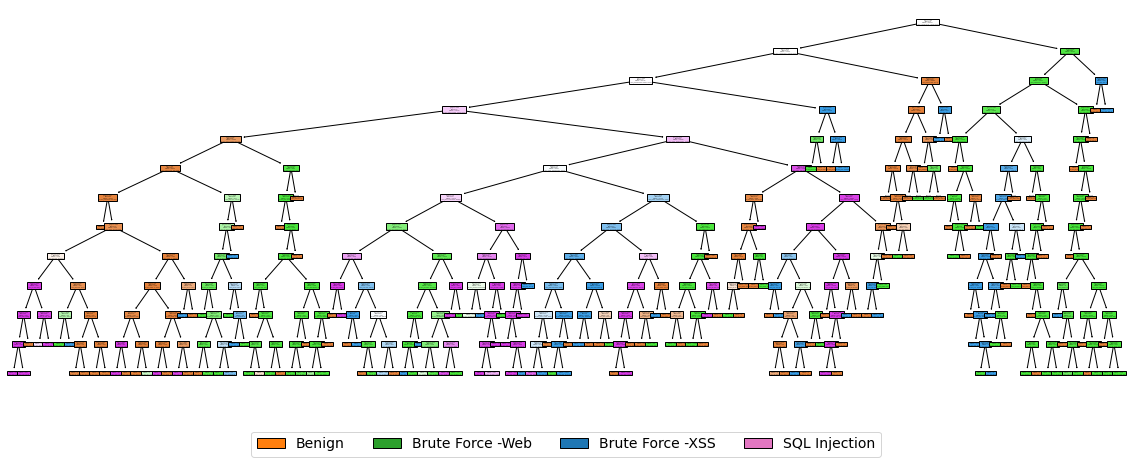

In [22]:
from matplotlib.patches import Patch
import matplotlib.pyplot as plt

print("Número total de hojas:", tree_model.tree_.n_leaves)

plt.figure(figsize=(20,7))
tree.plot_tree(tree_model, filled=True)

clases = ['Benign', 'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection']
colors = ['tab:orange', 'tab:green', 'tab:blue', 'tab:pink']
legend_elements = [Patch(facecolor=colors[i], edgecolor='black', label=clases[i]) for i in range(len(clases))]

plt.legend(handles=legend_elements, loc='lower center', ncol=len(clases), bbox_to_anchor=(0.5, -0.2), prop={'size': 14})

plt.show()

## Gráfico variando  max_depth Árbol de decisión

In [91]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.tree import export_graphviz
import graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
import time

max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
accuracies_arbol_prueba = []
tiempos_prueba = []

for depth in max_depths:
    start = time.perf_counter() 
    tree_model_prueba = tree.DecisionTreeClassifier(max_depth=depth, random_state=42) 
    tree_model_prueba = tree_model_prueba.fit(X_train_sm_df, Y_train_sm_df)
    y_pred_tree_prueba = tree_model_prueba.predict(X_test_sm_df)
    precision = tree_model_prueba.score(X_test_sm_df, Y_test_sm_df)
    accuracies_arbol_prueba.append(precision)
    end = time.perf_counter() 
    tiempos_prueba.append(end - start) 

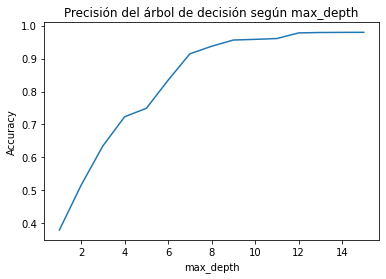

    max_depth  accuracy    tiempo
0           1  0.379213  0.004779
1           2  0.515584  0.008710
2           3  0.634934  0.012114
3           4  0.723350  0.016191
4           5  0.749135  0.021746
5           6  0.834496  0.024710
6           7  0.914647  0.028379
7           8  0.937578  0.024672
8           9  0.956524  0.027676
9          10  0.958561  0.018191
10         11  0.961064  0.018968
11         12  0.978136  0.019604
12         13  0.979377  0.020509
13         14  0.979792  0.020180
14         15  0.979905  0.020243


In [93]:
plt.plot(max_depths, accuracies_arbol_prueba)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Precisión del árbol de decisión según max_depth')
plt.show()
tiempos_prueba_horas = [t/3600 for t in tiempos_prueba]
results = pd.DataFrame({'max_depth': max_depths, 'accuracy': accuracies_arbol_prueba, 'tiempo': tiempos_prueba_horas})
print(results)

## Tabla hiperparametros Árbol de decision

In [94]:
import pandas as pd
from IPython.display import display, HTML

data = {
    "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    "random state": [42] * 15,
    "precisión": [0.379213, 0.515584, 0.634934, 0.723350, 0.749135, 0.834496, 0.914647, 0.937578, 0.956524, 0.958561, 0.961064, 0.978136, 0.979377, 0.979792, 0.979905],
    "tiempo (horas)": [0.002858, 0.005125, 0.007678, 0.010047, 0.012308, 0.013338, 0.015244, 0.015929, 0.016637, 0.017540, 0.018376, 0.018899, 0.019339, 0.019506, 0.019620]
}

mi_tabla = pd.DataFrame(data)

arbol_sorted = mi_tabla.sort_values('precisión', ascending=True)

titulo = "<h2 style='text-align: center;'>Modelo Árbol de decisión</h2>"

tabla_arbol = arbol_sorted.to_html(index=False)
tabla_arbol = titulo + tabla_arbol

style = """
<style>
  table {
    border-collapse: collapse;
    width: 100%;
    max-width: 800px;
  }
  th, td {
    text-align: left;
    padding: 8px;
  }
  th {
    background-color: #4CAF50;
    color: white;
  }
  tr:nth-child(even) {
    background-color: #f2f2f2;
  }
  tr:hover {
    background-color: #ddd;
  }
</style>
"""
display(HTML(style + tabla_arbol))


max_depth,random state,precisión,tiempo (horas)
1,42,0.379213,0.002858
2,42,0.515584,0.005125
3,42,0.634934,0.007678
4,42,0.723350,0.010047
5,42,0.749135,0.012308
6,42,0.834496,0.013338
7,42,0.914647,0.015244
8,42,0.937578,0.015929
9,42,0.956524,0.016637
10,42,0.958561,0.017540


# RANDOM FOREST

## Entrenamiento y obtención de predicciones Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
start = time.perf_counter()

rf_model = RandomForestClassifier(n_estimators=5)

X_train_nuevo = X_train_sm_df.copy()
cols_to_drop = X_train_nuevo.columns[:10]
X_train_nuevo.drop(labels=cols_to_drop, axis=1, inplace=True)

rf_model = rf_model.fit(X_train_nuevo, Y_train_sm_df.values.ravel())

X_test_nuevo= X_test_sm_df.copy()
cols_to_drop = X_test_nuevo.columns[:10]
X_test_nuevo.drop(labels=cols_to_drop, axis=1, inplace=True)

y_pred_rf = rf_model.predict(X_test_nuevo)

accuracy_score_FOREST= rf_model.score(X_test_nuevo, Y_test_sm_df)
print("Precisión Random forest:", rf_model.score(X_test_nuevo, Y_test_sm_df))

end = time.perf_counter()
elapsed_seconds = end - start
elapsed_hours = elapsed_seconds / 3600
print("Tiempo Random forest:", elapsed_hours, "hours")
tiempo_forest=elapsed_hours

Precisión Random forest: 0.9765298126606582
Tiempo Random forest: 0.025840496388888884 hours


## Matriz de confusión e informe de clasificación Random forest

Confusion Matrix: 
 [[345334    377     16     37]
 [    20 324477    344  20461]
 [     3   2345 335685   8598]
 [  2841    396      0 342438]]


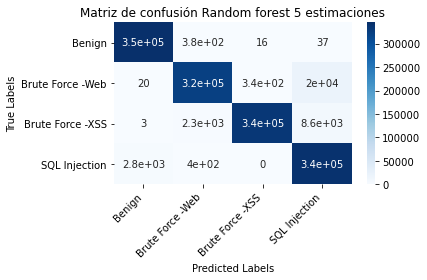

                  precision    recall  f1-score   support

          Benign       0.99      1.00      1.00    345764
Brute Force -Web       0.99      0.94      0.96    345302
Brute Force -XSS       1.00      0.97      0.98    346631
   SQL Injection       0.92      0.99      0.95    345675

        accuracy                           0.97   1383372
       macro avg       0.98      0.97      0.97   1383372
    weighted avg       0.98      0.97      0.97   1383372



In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
clases = ['Benign', 'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection']

cm_forest = confusion_matrix(Y_test_sm_df, y_pred_rf)
print("Confusion Matrix: \n", cm_forest) 

sns.heatmap(cm_forest, annot=True, cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=clases)
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=clases)
plt.title("Matriz de confusión Random forest 5 estimaciones")
ax = plt.gca()
ax.set_yticklabels(clases, rotation=0)
ax.set_xticklabels(clases, rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(classification_report(Y_test_sm_df, y_pred_rf, target_names=clases))

## Curva ROC Random forest

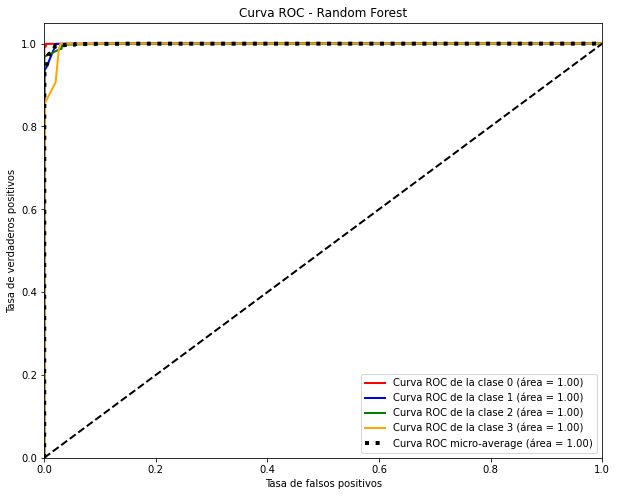

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(Y_test_sm_df, classes=np.unique(Y_test_sm_df))
n_classes = y_test_bin.shape[1]

y_score = rf_model.predict_proba(X_test_nuevo)

fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
lw = 2
colors = ['red', 'blue', 'green', 'orange']  # Puedes cambiar los colores según tus preferencias
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='Curva ROC de la clase {0} (área = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot(fpr_micro, tpr_micro, color='black', linestyle=':', linewidth=4,
         label='Curva ROC micro-average (área = {0:0.2f})'
         ''.format(roc_auc_micro))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC - Random Forest')
plt.legend(loc="lower right")
plt.show()


## Precisión por clase Random forest

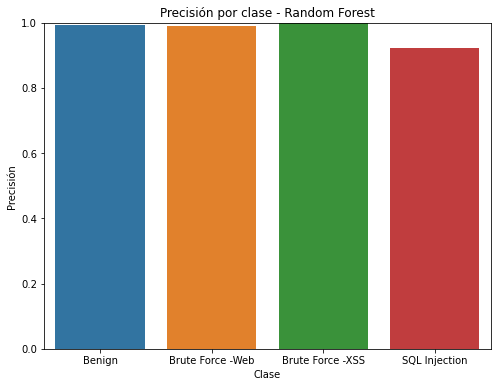

In [6]:
from sklearn.metrics import precision_score

precision_clase_forest = precision_score(Y_test_sm_df, y_pred_rf, average=None)

plt.figure(figsize=(8,6))
sns.barplot(x=['Benign', 'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection'], y=precision_clase_forest)
plt.ylim(0,1)
plt.title("Precisión por clase - Random Forest")
plt.xlabel("Clase")
plt.ylabel("Precisión")
plt.show()


## Otras gráficas: tabla importancia características Random forest

In [ ]:
import pandas as pd
from tabulate import tabulate
from IPython.display import display, HTML

#grafico 
importancias_rf = rf_model.feature_importances_
indices = np.argsort(importancias_rf)[::-1]
feature_names = X_train_nuevo.columns.values

plt.figure(figsize=(10,6))
plt.title("Importancia de características en Random forest")
plt.bar(range(X_train_nuevo.shape[1]), importancias_rf[indices], color="b", align="center")
plt.xticks(range(X_train_nuevo.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train_nuevo.shape[1]])
plt.tight_layout()
plt.savefig('Importancia_caracteristicas.png')
plt.show()

#tabla n1
importancias_rf = pd.Series(rf_model.feature_importances_, index=X_train_nuevo.columns)
importancias_rf = pd.DataFrame({'Característica': importancias_rf.index, 'Importancia': importancias_rf.values})
importancias_rf = importancias_rf.sort_values('Importancia', ascending=False)
print(importancias_rf)

#tabla n2
style = """
<style>
  table {
    border-collapse: collapse;
    width: 100%;
    max-width: 800px;
  }
  th, td {
    text-align: left;
    padding: 8px;
  }
  th {
    background-color: #4CAF50;
    color: white;
  }
  tr:nth-child(even) {
    background-color: #f2f2f2;
  }
  tr:hover {
    background-color: #ddd;
  }
</style>
"""

imp_caract = importancias_rf.sort_values('Importancia', ascending=False)
tabla_rf_imp = imp_caract.to_html(index=False)
display(HTML(style + tabla_rf_imp))


#tabla que muestra 50% importancia acumulada. Se utiliza 52 para aproximar.

rf_importancias_orden = imp_caract
rf_importancia_acumulada = rf_importancias_orden['Importancia'].cumsum()
rf_importancias_tabla50 = rf_importancias_orden[rf_importancia_acumulada <= 0.51 ]['Característica']

rf_importancias_tabla50= imp_caract[imp_caract['Característica'].isin(rf_importancias_tabla50)]
rf_importancias_tabla50 = rf_importancias_tabla50.rename(columns={'Importancia': 'Importancia Random Forest'})
rf_importancias_tabla50 = rf_importancias_tabla50.sort_values('Importancia Random Forest', ascending=False)

rf_importancia_total = rf_importancias_tabla50['Importancia Random Forest'].sum()
rf_fila = pd.DataFrame({'Característica': 'Total importancia', 'Importancia Random Forest': rf_importancia_total}, index=[0])
rf_importancias_tabla50 = rf_importancias_tabla50.append(rf_fila)
tabla_imp_rf50 = rf_importancias_tabla50.to_html(index=False)
display(HTML(style + tabla_imp_rf50))

## Gráfico variando varios n_estimations Random forest 

estimator:  1 terminado
estimator:  5 terminado
estimator:  10 terminado
estimator:  20 terminado
estimator:  50 terminado
estimator:  100 terminado
estimator:  200 terminado


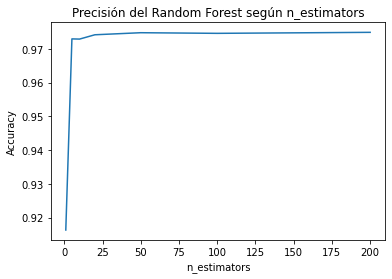

   n_estimators  accuracy    tiempo
0             1  0.916333  0.002809
1             5  0.972995  0.012872
2            10  0.972938  0.025801
3            20  0.974216  0.051100
4            50  0.974827  0.128270
5           100  0.974640  0.254293
6           200  0.974939  0.560731


In [95]:
from sklearn.ensemble import RandomForestClassifier
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
start = time.perf_counter()
n_estimators = [1, 5, 10, 20, 50, 100 , 200]

accuracies_rf_prueba = []
tiempos_rf_prueba = []

X_train_nuevo = X_train_sm_df.copy()
cols_to_drop = X_train_nuevo.columns[:10]
X_train_nuevo.drop(labels=cols_to_drop, axis=1, inplace=True)

X_test_nuevo= X_test_sm_df.copy()
cols_to_drop = X_test_nuevo.columns[:10]
X_test_nuevo.drop(labels=cols_to_drop, axis=1, inplace=True)


for n in n_estimators:
    start = time.perf_counter() 
    model_rf_prueba = RandomForestClassifier(n_estimators=n, random_state=42)
    
    model_rf_prueba = model_rf_prueba.fit(X_train_nuevo, Y_train_sm_df.values.ravel())

    y_pred_rf_prueba = model_rf_prueba.predict(X_test_nuevo)

    accuracy = model_rf_prueba.score(X_test_nuevo, Y_test_sm_df)
    accuracies_rf_prueba.append(accuracy)
    end = time.perf_counter() 
    tiempos_rf_prueba.append(end - start)
    print("estimator: " ,n, "terminado")
    
plt.plot(n_estimators, accuracies_rf_prueba)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Precisión del Random Forest según n_estimators')
plt.show()
tiempos_prueba_rf_horas = [t/3600 for t in tiempos_rf_prueba]

results = pd.DataFrame({'n_estimators': n_estimators, 'accuracy': accuracies_rf_prueba,'tiempo':tiempos_prueba_rf_horas})
print(results)

## Tabla hiperparámetros Random forest

In [4]:
import pandas as pd
from IPython.display import display, HTML


data_hipRF = {
    "n_estimators": [1, 5, 10, 20, 50, 100, 200],
    "precisión": [0.916333, 0.972995, 0.972938, 0.974216, 0.974827, 0.974640, 0.974939],
    "tiempo (horas)": [0.002620, 0.012715, 0.026018, 0.051645, 0.128876, 0.255989, 0.515306]
}

mi_tabla_hipRF = pd.DataFrame(data_hipRF)

mi_tabla_hipRF_ord = mi_tabla_hipRF.sort_values('n_estimators',ascending=True)
titulo_hipRF = "<h2 style='text-align: center;'>Modelo Random Forest</h2>"
mi_tabla_hipRF_ordhtlm = mi_tabla_hipRF_ord.to_html(index=False)
mi_tabla_hipRF_ordhtlm = titulo_hipRF + mi_tabla_hipRF_ordhtlm
style = """
<style>
  table {
    border-collapse: collapse;
    width: 100%;
    max-width: 800px;
  }
  th, td {
    text-align: left;
    padding: 8px;
  }
  th {
    background-color: #4CAF50;
    color: white;
  }
  tr:nth-child(even) {
    background-color: #f2f2f2;
  }
  tr:hover {
    background-color: #ddd;
  }
</style>
"""
display(HTML(style + mi_tabla_hipRF_ordhtlm))

n_estimators,precisión,tiempo (horas)
1,0.916333,0.002620
5,0.972995,0.012715
10,0.972938,0.026018
20,0.974216,0.051645
50,0.974827,0.128876
100,0.974640,0.255989
200,0.974939,0.515306


# KNN

## Entrenamiento y obtención de predicciones KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import time
start = time.perf_counter()

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_sm_df, Y_train_sm_df.values.ravel())

y_pred_knn = knn.predict(X_test_sm_df)

accuracy_score_KNN = accuracy_score(Y_test_sm_df, y_pred_knn)
print("Precision KNN: ",accuracy_score_KNN )

end = time.perf_counter()
elapsed_seconds = end - start
elapsed_hours = elapsed_seconds / 3600
print("Tiempo KNN: :", elapsed_hours, "hours")
tiempo_knn=elapsed_hours

## Matriz de confusión e informe de clasificación knn

Confusion Matrix: 
 [[345335    357     14     58]
 [     9 337330   1160   6803]
 [     0    977 345500    154]
 [     6   4104    600 340965]]


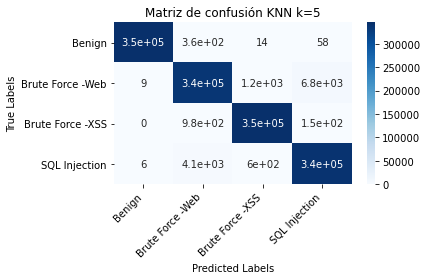

                  precision    recall  f1-score   support

          Benign       1.00      1.00      1.00    345764
Brute Force -Web       0.98      0.98      0.98    345302
Brute Force -XSS       0.99      1.00      1.00    346631
   SQL Injection       0.98      0.99      0.98    345675

        accuracy                           0.99   1383372
       macro avg       0.99      0.99      0.99   1383372
    weighted avg       0.99      0.99      0.99   1383372



In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

clases = ['Benign', 'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection']

cm_knn = confusion_matrix(Y_test_sm_df, y_pred_knn)
print("Confusion Matrix: \n", cm_knn) 

sns.heatmap(cm_knn, annot=True, cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=clases)
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=clases)
plt.title("Matriz de confusión KNN k=5")
ax = plt.gca()
ax.set_yticklabels(clases, rotation=0)
ax.set_xticklabels(clases, rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(classification_report(Y_test_sm_df, y_pred_knn, target_names=clases))

## Precisión por clase KNN

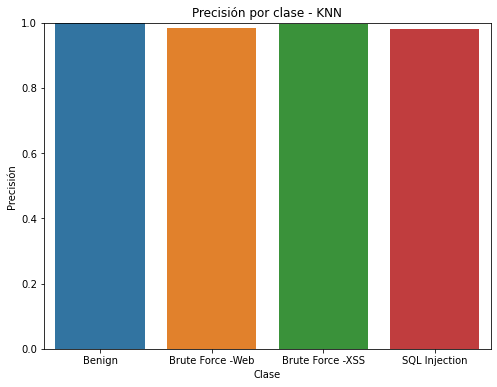

In [50]:
from sklearn.metrics import precision_score
import numpy as np

precision_clase_knn = precision_score(Y_test_sm_df, y_pred_knn, average=None)

plt.figure(figsize=(8,6))
sns.barplot(x=['Benign', 'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection'], y=precision_clase_knn)
plt.ylim(0,1)
plt.title("Precisión por clase - KNN")
plt.xlabel("Clase")
plt.ylabel("Precisión")
plt.show()

## Otras gráficas: tabla variando varios K en KNN 

Precision KNN para k = 7 : 0.9897612500469867
Tiempo de ejecución de la iteración: 1.6349983506666665 horas

Precision KNN para k = 10 : 0.9896853485541127
Tiempo de ejecución de la iteración: 1.8469552706944443 horas



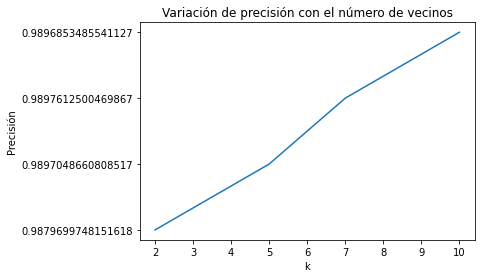

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import time

array_k = [2, 5, 7, 10]

precisiones_knn_prueba = []

for k in array_k:
    start = time.perf_counter()
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train_sm_df, Y_train_sm_df.values.ravel())
    
    y_pred_knn_prueba = knn.predict(X_test_sm_df)
   
    accuracy_score_KNN_prueba = accuracy_score(Y_test_sm_df, y_pred_knn_prueba)
    precisiones_knn_prueba.append(accuracy_score_KNN_prueba)
    print("Precision KNN para k =", k, ":", accuracy_score_KNN_prueba)

    end = time.perf_counter() 
    elapsed_seconds = end - start
    print("Tiempo:", elapsed_seconds / 3600, "horas\n")

"""
plt.plot(k_values_enteros, precisiones_knn_prueba)
plt.xlabel('k')
plt.ylabel('Precisión')
plt.title('Variación de precisión con el número de vecinos')
plt.show()
"""

## Tabla hiperparámetros knn

In [51]:
import pandas as pd
from IPython.display import display, HTML


data = {
    "k": [2, 5,7, 10],
    "precisión": [98.79699748151618, 98.97048660808517, 98.97612500469867, 98.96853485541127],
    "tiempo (horas)": [1.5208225091944445, 1.6490015243055556,1.6349983506666665 , 1.8469552706944443]
}

mi_tabla = pd.DataFrame(data)

mi_tabla_sorted = mi_tabla.sort_values('k',ascending=True)
titulo = "<h2 style='text-align: center;'>Modelo KNN</h2>"
tabla_knn = mi_tabla_sorted.to_html(index=False)
tabla_knn = titulo + tabla_knn
style = """
<style>
  table {
    border-collapse: collapse;
    width: 100%;
    max-width: 800px;
  }
  th, td {
    text-align: left;
    padding: 8px;
  }
  th {
    background-color: #4CAF50;
    color: white;
  }
  tr:nth-child(even) {
    background-color: #f2f2f2;
  }
  tr:hover {
    background-color: #ddd;
  }
</style>
"""
display(HTML(style + tabla_knn))

k,precisión,tiempo (horas)
2,98.796997,1.520823
5,98.970487,1.649002
7,98.976125,1.634998
10,98.968535,1.846955


# ENSEMBLE

##  Contrucción del Ensemble formado por Árbol, Random forest , KNN

In [17]:
import time
from sklearn.metrics import accuracy_score

start = time.perf_counter()

df_ensemble = pd.DataFrame({"TREE prediccion": y_pred_tree, "RFOREST prediccion": y_pred_rf, "KNN prediccion": y_pred_knn})

majority_values = df_ensemble.apply(lambda x: x.value_counts().idxmax(), axis=1)

df_ensemble['GLOBAL prediccion'] = majority_values

accuracy_score_ensemble = accuracy_score(Y_test_sm_df['Label'], df_ensemble['GLOBAL prediccion'])
print("Precisión global juntos 3 modelos: ", accuracy_score_ensemble * 100, "%")

end = time.perf_counter()
elapsed_seconds = end - start
tiempo_ensemble = elapsed_seconds / 3600
print("Tiempo juntos 3 modelos :", tiempo_ensemble, "hours")

NameError: name 'y_pred_knn' is not defined

## Matriz de confusión e informe de clasificación Ensemble

Matriz de confusión:
[[345336    405      2     21]
 [    11 338114    805   6372]
 [     0    253 337055   9323]
 [     9   4159      0 341507]]


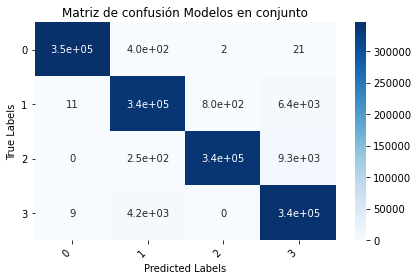

Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    345764
           1       0.99      0.98      0.98    345302
           2       1.00      0.97      0.98    346631
           3       0.96      0.99      0.97    345675

    accuracy                           0.98   1383372
   macro avg       0.98      0.98      0.98   1383372
weighted avg       0.98      0.98      0.98   1383372



<Figure size 432x288 with 0 Axes>

In [18]:
clases = ['0','1','2','3']

confusion_mat = confusion_matrix(Y_test_sm_df['Label'], df_ensemble['GLOBAL prediccion'])
print("Matriz de confusión:")
print(confusion_mat)

sns.heatmap(confusion_mat, annot=True, cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=clases)
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=clases)
plt.title("Matriz de confusión Modelos en conjunto")

ax = plt.gca()
ax.set_yticklabels(clases, rotation=0)
ax.set_xticklabels(clases, rotation=45, ha='right')
plt.tight_layout()
plt.show()

classification_rep = classification_report(Y_test_sm_df['Label'], df_ensemble['GLOBAL prediccion'],target_names=clases)
print("Informe de clasificación:")
print(classification_rep)

## Precisión por clases Ensemble

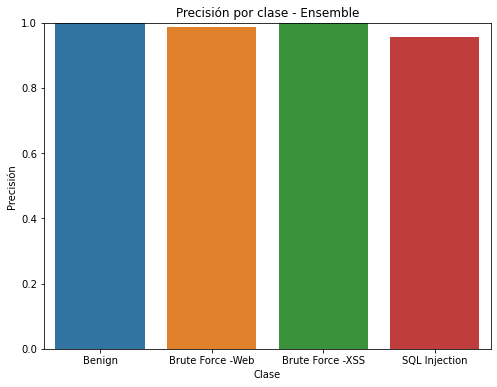

<Figure size 432x288 with 0 Axes>

In [83]:
from sklearn.metrics import precision_score
precision_clase_ensemble = precision_score(Y_test_sm_df, df_ensemble['GLOBAL prediccion'], average=None)

plt.figure(figsize=(8,6))
sns.barplot(x=['Benign', 'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection'], y=precision_clase_ensemble)
plt.ylim(0,1)
plt.title("Precisión por clase - Ensemble")
plt.xlabel("Clase")
plt.ylabel("Precisión")
plt.show()

## Ficha ensemble

In [268]:
import pandas as pd
from IPython.display import display, HTML


data = {
    "precisión": [98.45594677353597],
    "tiempo (horas)": [0.1902835186388883]
}

mi_tabla = pd.DataFrame(data)

titulo = "<h2 style='text-align: center;'>Modelo Ensemble</h2>"
tabla_ensemble = mi_tabla.to_html(index=False)
tabla_ensemble = titulo + tabla_ensemble
style = """
<style>
  table {
    border-collapse: collapse;
    width: 100%;
    max-width: 800px;
  }
  th, td {
    text-align: left;
    padding: 8px;
  }
  th {
    background-color: #4CAF50;
    color: white;
  }
  tr:nth-child(even) {
    background-color: #f2f2f2;
  }
  tr:hover {
    background-color: #ddd;
  }
</style>
"""
display(HTML(style + tabla_ensemble))

precisión,tiempo (horas)
98.455947,0.190284


## Gráfico de comparación por precisión por clases 3 modelos que conforman el ensemble+ ensemble

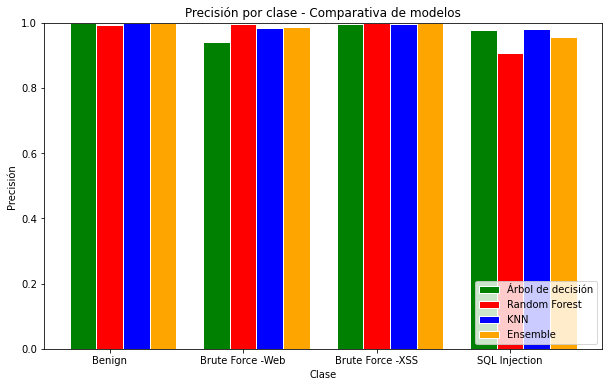

Precisión media clase Bening:  99.70754796083035
Precisión media clase Brute Force - Web:  97.40429277462691
Precisión media clase Brute force - XSS:  99.68944969979545
Precisión media clase SQL injection:  95.4320206142323


<Figure size 432x288 with 0 Axes>

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

precision_clase_arbol = precision_score(Y_test_sm_df, y_pred_tree, average=None)
precision_clase_forest = precision_score(Y_test_sm_df, y_pred_rf, average=None)
precision_clase_knn = precision_score(Y_test_sm_df, y_pred_knn, average=None)
precision_clase_ensemble = precision_score(Y_test_sm_df, df_ensemble['GLOBAL prediccion'], average=None)

plt.figure(figsize=(10, 6))

clases = ['Benign', 'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection']

bar_width = 0.2

r1 = np.arange(len(clases))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.bar(r1, precision_clase_arbol, color='g', width=bar_width, edgecolor='white', label='Árbol de decisión')
plt.bar(r2, precision_clase_forest, color='r', width=bar_width, edgecolor='white', label='Random Forest')
plt.bar(r3, precision_clase_knn, color='b', width=bar_width, edgecolor='white', label='KNN')
plt.bar(r4, precision_clase_ensemble, color='orange', width=bar_width, edgecolor='white', label='Ensemble')

plt.ylim([0, 1])
plt.xticks([r + bar_width for r in range(len(clases))], clases)
plt.title('Precisión por clase - Comparativa de modelos')
plt.xlabel('Clase')
plt.ylabel('Precisión')
plt.legend()
plt.legend(loc='lower right')

plt.show()

precision_media_benign = (np.mean([precision_clase_arbol[0], precision_clase_forest[0], precision_clase_knn[0]]))*100
precision_media_bruteWeb = (np.mean([precision_clase_arbol[1], precision_clase_forest[1], precision_clase_knn[1]]))*100
precision_media_bruteXSS = (np.mean([precision_clase_arbol[2], precision_clase_forest[2], precision_clase_knn[2]]))*100
precision_media_SQLInj = (np.mean([precision_clase_arbol[3], precision_clase_forest[3], precision_clase_knn[3]]))*100
                          
print("Precisión media clase Bening: ",precision_media_benign)
print("Precisión media clase Brute Force - Web: ",precision_media_bruteWeb)
print("Precisión media clase Brute force - XSS: ",precision_media_bruteXSS)
print("Precisión media clase SQL injection: ",precision_media_SQLInj)

## Tabla precisiones medias por ataque (clase)

In [269]:
# import pandas as pd
from IPython.display import HTML, display
import numpy as np

precision_clase_arbol=precision_clase_arbol*10

mejora_ensemble_benign = 'Yes' if precision_media_benign < precision_clase_ensemble[0] else 'No'
mejora_ensemble_bruteWeb = 'Yes' if precision_media_bruteWeb < precision_clase_ensemble[1]else 'No'
mejora_ensemble_bruteXSS = 'Yes' if precision_media_bruteXSS < precision_clase_ensemble[2] else 'No'
mejora_ensemble_SQLInj = 'Yes' if precision_media_SQLInj < precision_clase_ensemble[3] else 'No'

data = {
    'Type of attack (class)': ['Bening', 'Brute Force - Web', 'Brute force - XSS', 'SQL injection'],
    'Decision Tree accuracy ': [precision_clase_arbol[0], precision_clase_arbol[1], precision_clase_arbol[2], precision_clase_arbol[3]],
    'Random Forest accuracy ': [precision_clase_forest[0], precision_clase_forest[1], precision_clase_forest[2], precision_clase_forest[3]],
    'KNN accuracy': [precision_clase_knn[0], precision_clase_knn[1], precision_clase_knn[2], precision_clase_knn[3]],
    'Average accuracy': [precision_media_benign, precision_media_bruteWeb, precision_media_bruteXSS, precision_media_SQLInj],
    'Ensemble accuracy': [precision_clase_ensemble[0], precision_clase_ensemble[1], precision_clase_ensemble[2], precision_clase_ensemble[3]],
    'Improvement achieved with Ensemble?': [mejora_ensemble_benign, mejora_ensemble_bruteWeb, mejora_ensemble_bruteXSS, mejora_ensemble_SQLInj]

}

df = pd.DataFrame(data)

style = """
<style>
  table {
    border-collapse: collapse;
    width: 100%;
    max-width: 800px;
  }
  th, td {
    text-align: left;
    padding: 8px;
  }
  th {
    background-color: #4CAF50; 
    color: white;
  }
  tr:nth-child(even) {
    background-color: #f2f2f2;
  }
  tr:hover {
    background-color: #ddd;
  }
</style>
"""

tabla5 = df.to_html(index=False)
tabla5 = style + tabla_html
display(HTML(tabla5))


Característica,Importancia
Init Fwd Win Byts,0.139006
Subflow Fwd Pkts,0.083320
Subflow Fwd Byts,0.066060
Bwd Pkt Len Std,0.061915
Bwd Pkt Len Max,0.055015
Subflow Bwd Byts,0.049763
Flow IAT Std,0.044732
Fwd IAT Std,0.043172
Flow IAT Mean,0.040877
Bwd IAT Tot,0.040152


# RED NEURONAL

## Entrenamiento y obtención de predicciones Red neuronal

In [185]:
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve,auc
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


y_train_one_hot = to_categorical(Y_train_sm_df)
y_test_one_hot = to_categorical(Y_test_sm_df)

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(64, activation='relu'))

model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=7)

start_time = time.time()
history = model.fit(X_train, y_train_one_hot, epochs=70, batch_size=64, verbose=1, validation_split=0.2, callbacks=[early_stopping])
end_time = time.time()
tiempo_red = (end_time - start_time)/3600

y_pred = model.predict(X_test)
y_pred_red = tf.argmax(y_pred, axis=1)
y_test = tf.argmax(y_test_one_hot, axis=1)
accuracy_score_red = accuracy_score(y_test, y_pred_red)

print('Precisión red neuronal :', accuracy_score_red*100, '%')
print('Tiempo red neuronal:', tiempo_red,' hours')

Epoch 1/70
35109/35109 [==============================] - 212s 6ms/step - loss: 0.4970 - accuracy: 0.7722 - val_loss: 0.4149 - val_accuracy: 0.7969
Epoch 2/70
35109/35109 [==============================] - 213s 6ms/step - loss: 0.3805 - accuracy: 0.8221 - val_loss: 0.3635 - val_accuracy: 0.8407
Epoch 3/70
35109/35109 [==============================] - 205s 6ms/step - loss: 0.3542 - accuracy: 0.8316 - val_loss: 0.3476 - val_accuracy: 0.8407
Epoch 4/70
35109/35109 [==============================] - 206s 6ms/step - loss: 0.3410 - accuracy: 0.8430 - val_loss: 0.3357 - val_accuracy: 0.8458
Epoch 5/70
35109/35109 [==============================] - 209s 6ms/step - loss: 0.3288 - accuracy: 0.8516 - val_loss: 0.3226 - val_accuracy: 0.8524
Epoch 6/70
35109/35109 [==============================] - 213s 6ms/step - loss: 0.3156 - accuracy: 0.8553 - val_loss: 0.3096 - val_accuracy: 0.8538
Epoch 7/70
35109/35109 [==============================] - 211s 6ms/step - loss: 0.3021 - accuracy: 0.8571 - val_

In [ ]:
from tensorflow.keras.utils import to_categorical
print("Y_train_sm_df: \n ", Y_train_sm_df)
print("y_train_one_hot: \n ", y_train_one_hot)
print("y_pred: \n " ,y_pred) # las predicciones de la red puras (vector con 4 valores decimales por cada fila)
print("y_pred_red: \n " ,y_pred_red) #HECHO ARGMAX (vector con 4 valores de tres ceros, 1 uno por cada fila)

# Matriz de confusión e informe de clasificación Red neuronal

Confusion matrix:
 [[342072   3588     23     81]
 [    73 320119  23956   1154]
 [    88   7361 339182      0]
 [  3394   3143  87859 251279]]


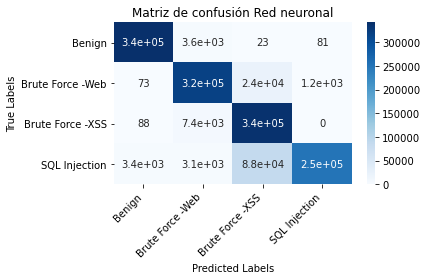

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    345764
           1       0.96      0.93      0.94    345302
           2       0.75      0.98      0.85    346631
           3       1.00      0.73      0.84    345675

    accuracy                           0.91   1383372
   macro avg       0.92      0.91      0.91   1383372
weighted avg       0.92      0.91      0.91   1383372



<Figure size 432x288 with 0 Axes>

In [27]:
conf_matrix_red = confusion_matrix(y_test, y_pred_red)
print('Confusion matrix:\n', conf_matrix_red)
clases = ['Benign', 'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection']

sns.heatmap(conf_matrix_red, annot=True, cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=clases)
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=clases)
plt.title("Matriz de confusión Red neuronal")
ax = plt.gca()
ax.set_yticklabels(clases, rotation=0)
ax.set_xticklabels(clases, rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(classification_report(y_test, y_pred_red))


## Curva ROC Red neuronal

43231/43231 [==============================] - 53s 1ms/step


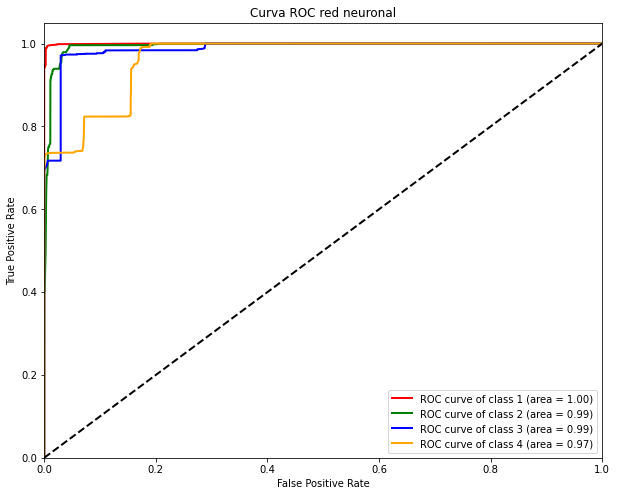

In [28]:
y_prob = model.predict(X_test)

fpr = {}
tpr = {}
roc_auc = {}
for i in range(y_test_one_hot.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = ['red', 'green', 'blue', 'orange']
for i, color in zip(range(y_test_one_hot.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC red neuronal')
plt.legend(loc="lower right")
plt.show()

## Precisión por clase Red neuronal

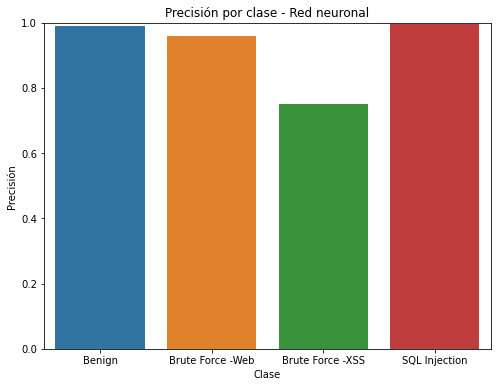

<Figure size 432x288 with 0 Axes>

In [29]:
from sklearn.metrics import precision_score
import numpy as np

precision_red = precision_score(y_test, y_pred_red, average=None)

plt.figure(figsize=(8,6))
sns.barplot(x=['Benign', 'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection'], y=precision_red)
plt.ylim(0,1)
plt.title("Precisión por clase - Red neuronal")
plt.xlabel("Clase")
plt.ylabel("Precisión")
plt.show()

## Otras gráficas: grafica losses-accuracy

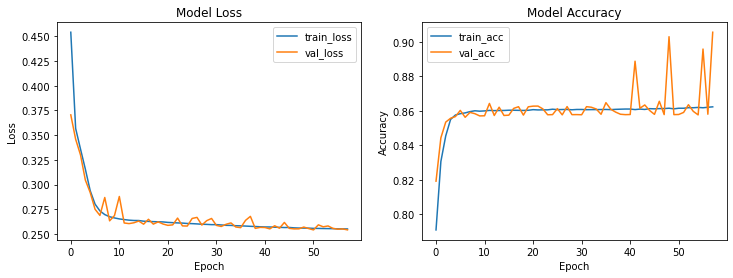

In [30]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

 ## Tabla hiperparámetros Red neuronal

In [184]:
import pandas as pd
from IPython.display import display, HTML

datos = [
    [128, 64, 64, None, None, None, 70, 0.00001, 7, 86.2726728602284, 1.82402603156036],
    [128, 128, 64, 64, None, None, 70, 0.00001, 7, 86.249613263822, 1.44069810026221],
    [128, 128, 64, 64, 64, None, 70, 0.00001, 7, 90.55062557287556, 1.2912698796722624],
    [128, 128, 64, 64, 64, 64, 70, 0.00001, 7, 86.2478783725563, 0.7004046854045656],
    [256, 128, 128, 64, 64, None, 70, 0.00001, 7, 86.3151776962378, 1.4755618606011],
    [128, 64, 64, None, None, None, 80, 0.0001, 7, 85.7488079851261, 0.7194871220323774],
    [128, 128, 64, 64, None, None, 80, 0.0001, 7, 85.5006462469964, 0.6538443232244916],
    [128, 128, 64, 64, 64, None, 80, 0.0001, 7, 85.759940204081, 1.41813992930783],
    [128, 128, 64, 64, 64, 64, 80, 0.0001, 7, 86.0245834092348, 0.7884577439890965],
    [256, 128, 128, 64, 64, None, 80, 0.0001, 7, 86.0553054420647, 0.7426432730754217],
    [128, 64, 64, None, None, None, 90, 0.00001, 7, 90.3624621576842, 3.26916958610216],
    [128, 128, 64, 64, None, None, 90, 0.00001, 7, 86.193157010551, 2.0319568713506],
    [128, 128, 64, 64, 64, None, 90, 0.00001, 7, 86.3404781938625, 2.25067535075876],
    [128, 128, 64, 64, 64, 64, 90, 0.00001, 7, 86.1187012603985, 2.53208684722582],
    [256, 128, 128, 64, 64, None, 90, 0.00001, 7, 85.7556029759168, 4.3571115906371],
    [128, 64, 64, None, None, None, 100, 0.00001, 7, 86.0449683816066, 3.8811697843397],
    [128, 128, 64, 64, None, None, 100, 0.00001, 7, 86.2610346313211, 3.99242004639572],
    [128, 128, 64, 64, 64, None, 100, 0.00001, 7, 85.786614157291, 2.7853706090196],
    [128, 128, 64, 64, 64, 64, 100, 0.00001, 7, 86.2480952339645, 4.27860494090451],
    [256, 128, 128, 64, 64, None, 100, 0.00001, 7, 85.7701326902669, 11.0611670146385],
    [128, 64, 64, None, None, None, 90, 0.00001, 8, 86.209566190439, 2.08207377201981],
    [128, 128, 64, 64, None, None, 90, 0.00001, 8, 86.331731450398, 2.34429670128557],
    [128, 128, 64, 64, 64, None, 90, 0.00001, 8, 85.7754096512001, 1.95056069301234],
    [128, 128, 64, 64, 64, 64, 90, 0.00001, 8, 89.8455368476447, 1.13584013680617],
    [256, 128, 128, 64, 64, None, 90, 0.00001, 8, 90.3249451340637, 1.48481075651115]]

columns = ['capa entrada', 'capa1', 'capa2', 'capa3', 'capa4', 'capa5', 'epocas', 'learning rate', 'early stopping', 'precision', 'tiempo']



df = pd.DataFrame(datos, columns=columns)
df.fillna('-', inplace=True)

tabla = df.to_html(index=False, classes='tabla_css')
style = '''
<style>
.tabla_css {
  font-family: Arial, Helvetica, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

.tabla_css td, .tabla_css th {
  border: 1px solid #ddd;
  padding: 8px;
}

.tabla_css tr:nth-child(even){background-color: #f2f2f2;}

.tabla_css tr:hover {background-color: #ddd;}

.tabla_css th {
  padding-top: 12px;
  padding-bottom: 12px;
  text-align: left;
  background-color: #4CAF50;
  color: white;
}
</style>
'''

display(HTML(tabla+style))

capa entrada,capa1,capa2,capa3,capa4,capa5,epocas,learning rate,early stopping,precision,tiempo
128,64,64,-,-,-,70,0.00001,7,86.272673,1.824026
128,128,64,64,-,-,70,0.00001,7,86.249613,1.440698
128,128,64,64,64,-,70,0.00001,7,90.550626,1.291270
128,128,64,64,64,64,70,0.00001,7,86.247878,0.700405
256,128,128,64,64,-,70,0.00001,7,86.315178,1.475562
128,64,64,-,-,-,80,0.00010,7,85.748808,0.719487
128,128,64,64,-,-,80,0.00010,7,85.500646,0.653844
128,128,64,64,64,-,80,0.00010,7,85.759940,1.418140
128,128,64,64,64,64,80,0.00010,7,86.024583,0.788458
256,128,128,64,64,-,80,0.00010,7,86.055305,0.742643


# ANÁLISIS DE RESULTADOS 

## Tabla precisiones de todos los modelos


In [219]:
import pandas as pd
from IPython.core.display import HTML

df = pd.DataFrame({'Modelo': ['Regresión Logística', 'SGD', 'Árbol decisión', 'Random Forest', 'KNN', 'Red neuronal','Ensemble'],
                   'Precisión (%)': [83.13512200, 80.6623236, 97.8136032, 97.299555, 98.970487, 90.550625,98.455946],
                    'Tiempo (horas)': [0.062919, 0.007545,0.018899,0.012715,1.649002,1.291269,0.190283]})


style = """
<style>
table {
  font-family: Arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #ddd;
  text-align: left;
  padding: 8px;
}

th {
  background-color: #4CAF50;
  color: white;
}
</style>
"""

tabla_resultados = df.to_html(index=False)
HTML(style + tabla_resultados)

Modelo,Precisión (%),Tiempo (horas)
Regresión Logística,83.135122,0.062919
SGD,80.662324,0.007545
Árbol decisión,97.813603,0.018899
Random Forest,97.299555,0.012715
KNN,98.970487,1.649002
Red neuronal,90.550625,1.291269
Ensemble,98.455946,0.190283


In [223]:
import pandas as pd
from IPython.core.display import HTML

df = pd.DataFrame({'Model': ['Logistic Regression', 'SGD', 'Decision Tree', 'Random Forest', 'KNN', 'Neuronal Network','Ensemble'],
                   'Accuracy (%)': [83.13512200, 80.6623236, 97.8136032, 97.299555, 98.970487, 90.550625,98.455946],
                    'Time (hours)': [0.062919, 0.007545,0.018899,0.012715,1.649002,1.291269,0.190283]})


style = """
<style>
table {
  font-family: Arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #ddd;
  text-align: left;
  padding: 8px;
}

th {
  background-color: #4CAF50;
  color: white;
}
/* Estilo para la precisión de KNN */
tr:nth-child(5) td:nth-child(2) {
  color: blue;
}
</style>
"""

tabla_ingles = df.to_html(index=False)
HTML(style + tabla_ingles)

Model,Accuracy (%),Time (hours)
Logistic Regression,83.135122,0.062919
SGD,80.662324,0.007545
Decision Tree,97.813603,0.018899
Random Forest,97.299555,0.012715
KNN,98.970487,1.649002
Neuronal Network,90.550625,1.291269
Ensemble,98.455946,0.190283


# Gráfica-tiempo-precisión todos los modelos 

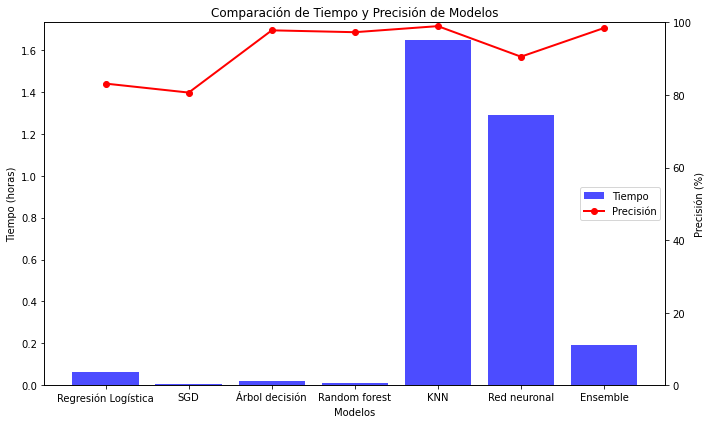

In [11]:
import matplotlib.pyplot as plt

modelos = ['Regresión Logística','SGD','Árbol decisión', 'Random forest','KNN', 'Red neuronal','Ensemble']
tiempos = [0.062919, 0.007545,0.018899,0.012715,1.649002,1.291269, 0.190284]
accuracies = [83.13512200, 80.6623236, 97.8136032, 97.299555, 98.970487, 90.550625, 98.455947]
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(modelos, tiempos, color='b', alpha=0.7, label='Tiempo')
ax1.set_xlabel('Modelos')
ax1.set_ylabel('Tiempo (horas)')

ax2 = ax1.twinx()
ax2.plot(modelos, accuracies, color='r', marker='o', linestyle='-', linewidth=2, label='Precisión')
ax2.set_ylabel('Precisión (%)')
ax2.set_ylim([0, 100])

plt.xticks(rotation=45, ha='right')
plt.title('Comparación de Tiempo y Precisión de Modelos')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='center right')

plt.tight_layout()
plt.show()
